# 1. O que é aprendizado de máquina?
É a extração de conhecimento a partir de dados utilizando ferramentas dos campos da estatística, inteligência artificial e ciência da computação.

## 1.1. No mundo dos negócios
    1. Filmes - Netflix
    2. Música - Spotify
    3. Comida - iFood
    4. Produtos - Amazon
    5. Reconhecimento facial - Facebook

## 1.2. Na ciência
    1. Entender estrelas
    2. Encontrar planetas distantes
    3. Descobrir novas partículas
    4. Analisar sequências de DNA
    5. Fornecer tratamentos personalizados para o câncer

# 2. Por que usar aprendizado de máquina?

No início das aplicações inteligentes, os sistemas utilizavam regreas de decisão **if** e **else** programadas por humanos para processar dados. Essa abordagem apresenta duas grandes desvantagens:
1. A lógica é específica para um única tarefa
2. Requer um conhecimento profundo de como uma decisão deve ser tomada

## 2.1. Exemplo - Reconhecimento facial
* O problema só foi solucionado em 2001
* O computador percebe os pixels de um modo totalmente diferente dos humanos
* Esta diferença torna praticamente impossível que um humano desenvolva regras de decisão para o reconhecimento facial
* O aprendizado de máquina soluciona este problema a partir de um grande número de imagens de rostos de pessoas

# 3. Aplicações do aprendizado de máquina

Existem dois tipos de modelos de aprendizado de máquina:
1. Aprendizado não supervisionado
2. Aprendizado supervisionado

## 3.1. Aprendizado não supervisionado

Neste tipo de algoritmo, apenas os inputs são conhecidos e nenhum output é fornecido para o algoritmo. Apesar de existirem muitas aplicações para estes algoritmos, eles são mais difíceis de entender e de serem avaliados.

### 3.1.1. Exemplos de aprendizado não supervisionado
* Identificar tópicos em um conjunto de publicações de um blog
* Segmentar os consumidores em grupos com preferências similares
* Detectar padrões anormais de acesso a um website

## 3.2. Aprendizado supervisionado

Os algoritmos de aprendizado de máquina que aprendem a partir de pares de inputs e outputs são chamados de algoritmos de aprendizado supervisionado porque o usuário ensina o algoritmo os outputs desejados para cada exemplo de input fornecido. Apesar de ser trabalhoso criar uma base de dados para fornecer para o algoritmo, os algoritmos de aprendizado supervisionado são fáceis de entender e a sua performance é fácil de ser medida.

### 3.2.1. Exemplos de de aprendizado supervisionado
* Identificar o CEP a partir de dígitos escritos à mão em um envelope
* Determinar se um tumor é maligno ou benigno a partir de exames de imagem
* Detectar atividade fraudulenta em transações de cartão de crédito

### 3.2.2. Tipos de modelos de aprendizado supervisionado
1. Classificação
2. Regressão

# 4. k-Nearest Neighbors

É um dos algoritmos mais simples de aprendizado de máquina supervisionado de classificação. O primeiro passo é fornecer uma base de dados com inputs e outputs para formar o conjunto de treinamento do modelo. Com base neste conjunto de dados o modelo 'aprende' a classificar novos inputs. À medida que fornecemos novos inputs, o algoritmo procura pelos k vizinhos mais próximos, e prevê a classificação destes novos inputs de acordo com os k vizinhos mais próximos encontrados.

## 4.1. Objetivo

Construir um modelo de aprendizado de máquina que, a partir de um conjunto de dados, conhecido como conjunto de treinamento, consiga prever a classificação de novos dados fornecidos ao modelo.

## 4.2. Treinando e testando o modelo

Antes de aplicarmos o modelo, precisamos saber se podemos confiar nas suas previsões. Não podemos usar o conjunto de dados fornecido para o treinamento do algoritmo para testá-lo, uma vez que o modelo lembraria de todos os dados e acertaria todas as suas previsões.

Para testar o modelo, precisamos fornecer dados novos mas dados para os quais conhecemos os outpus. O procedimento geralmente utilizado é dividir o conjuntos de dados disponível em duas partes. Uma parte é utilizada para construir o modelo de aprendizado de máquina, e é chamada de **conjunto de treinamento** ou **dados de treinamento**. A outra parte é usada para avaliar o quão bem o modelo funciona, e é chamada de **conjunto de teste** ou **dados de teste**.

# 5. Exemplo prático

Começamos importando os pacotes necessários para desenvolver o modelo de k-NN.

In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

## 5.1. Base de dados

Para este exemplo foi utilizada a base de dados de câncer de mama do módulo `sklearn.datasets`. A base de dados classifica os tumores em duas categorias, maligno e benigno e possui 568 inputs com 30 características para cada tumor.

In [126]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
print(df.shape)

(569, 30)


In [127]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 5.2. Analisando os dados

Para simplificar o modelo, escolhemos duas dessas características aleatoriamente, 'área média' e 'compacidade média'. Plotando os dados em um gráfico de dispersão podemos ver que o modelo de k-NN é adequado para este caso.

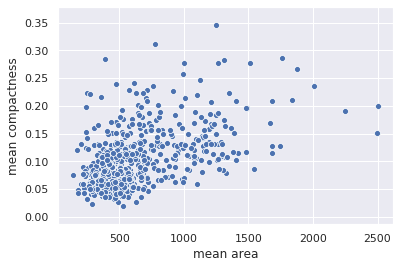

In [128]:
sns.scatterplot(x='mean area', y='mean compactness', data=df)

## 5.3. O conjunto de treinamento

No `scikit-learn`, geralmente denotamos os dados com um X maiúsculo, enquanto os rótulos ou classificações são denotadas por um y minúsculo. Isso é inspirado na formulação matemática de função, *f(x)=y*, na qual *x* é o input e *y* é o output. O X é maiúsculo pois refere-se a uma matriz, enquanto y é minúsculo pois refere-se a um vetor.

Note que atribuímos valores numéricos para que o modelo consiga interpretar os dados, 0 para tumores malignos e 1 para tumores benignos.

In [129]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

Agora, dividimos a base de dados para treinar e testar o algoritmo. A função `train_test_split` embaralha os dados e, por padrão, determina 75% da base de dados original para o **conjunto de terinamento** e 25% para o **conjunto de teste**.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 5.4. O modelo

Definimos `KNeighborsClassifier` para procurar pelos 5 vizinhos mais próximos. Além disso, informamos explicitamente para o classificador utilizar a distância Euclidiana para determinar a proximidade entre os pontos da vizinhança.

In [131]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 5.5. Previsão

Usando o nosso modelo já treinado, podemos prever se um tumor é benigno ou maligno com base em novos valores médios da área e da compacidade do tumor, provenientes do **conjunto de teste**.

In [132]:
y_pred = knn.predict(X_test)

Podemos comparar visualmente as previsões feitas pelo modelo com a amostra do conjunto de treinamento pelos seus respectivos gráficos de dispersão.

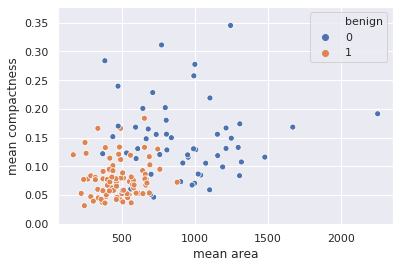

In [133]:
sns.scatterplot(x='mean area',
                y='mean compactness',
                hue='benign',
                data=X_test.join(y_test, how='outer'))

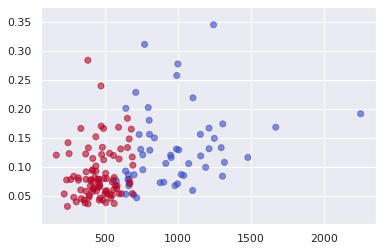

In [134]:
plt.scatter(X_test['mean area'],
            X_test['mean compactness'],
            c=y_pred,
            cmap='coolwarm',
            alpha=0.6)

Uma outra maneira de avaliar o modelo, mais precisa, é pela matriz de confusão. Os números na diagonal principal da matriz correspondem às previsões corretas enquanto os outros números correnspondem a falsos positivos e falsos negativos.

In [135]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

Dada a matriz de confusão, nosso modelo tem uma **precisão de 84,6%**, resultado da divisão 121/143, a soma das previsões corretas dividida pelo número de previsões total.

## 5.6. Testando para k = 1

Desta vez, definimos o modelo para procurar por um único vizinho mais próximo.

In [136]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [137]:
y_pred = knn.predict(X_test)

In [138]:
confusion_matrix(y_test, y_pred)

array([[39, 16],
       [14, 74]])

Portanto, para k = 1, o modelo tem uma **precisão de 79%**.

## 5.7. Testanto para k = 9

Agora, definimos o modelo para procurar pelos 9 vizinhos mais próximos.

In [139]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [140]:
y_pred = knn.predict(X_test)

In [141]:
confusion_matrix(y_test, y_pred)

array([[41, 14],
       [ 7, 81]])

Para k = 9, o modelo passa a ter uma **precisão de 85,3%**.

## 5.8. Testanto para k = 15

Definindo o modelo para procurar pelos 15 vizinhos mais próximos.

In [142]:
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [143]:
y_pred = knn.predict(X_test)

In [144]:
confusion_matrix(y_test, y_pred)

array([[41, 14],
       [ 6, 82]])

Para k=15, o modelo tem uma **precisão de 86%**.